# LA Area Strain Curves : CRT-01 

## Global and Regional (Manual delineation) Strains

In [1]:
import pandas as pd
import numpy as np

In [2]:
'''
This function drops the column with cell indice from area-strains.csv files
'''

def clean_areastrains_df(df):
    
    df = df.drop(labels='Unnamed: 0', axis=1)
    
    return df

In [3]:
# Array of DataFrames.
# Contains area strain of ALL cells across 9 time phases
ar_df = np.zeros((9, 149195))

In [4]:
for i in range(1, 10):
    
    print(i)
    
    df = pd.read_csv(f'/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/MT-HiRes/SW-0.0-BE-4e-9/area-strains-{i}.csv')
    df = clean_areastrains_df(df)
    
    j = i-1
    ar_df[(j),:] = np.squeeze(df.to_numpy())

hello-1
hello-2
hello-3
hello-4
hello-5
hello-6
hello-7
hello-8
hello-9


In [5]:
df.to_numpy().shape

(149195, 1)

In [6]:
df.to_numpy()[0]

array([-0.11133129])

In [7]:
np.squeeze(df.to_numpy()).shape

(149195,)

In [8]:
np.squeeze(df.to_numpy())[0]

-0.1113312855654185

In [9]:
ar_df[0,0]

-0.0125102979447758

In [10]:
import matplotlib.pyplot as plt

In [11]:
# Array containing mean area strains across cells for a given time frame
ar_means = np.array

In [12]:
np.mean(ar_df[0, :])   # take mean area strain across all cells at dcm1

0.018124992496686847

In [13]:
# array of mean area change across ALL cells, for every time phase
ar_means = ar_df.mean(axis=1)
ar_means

array([ 0.01812499,  0.03418616,  0.06594102,  0.07055217,  0.0589061 ,
        0.01408853, -0.04995209, -0.04699614, -0.04091437])

In [14]:
# Following code appends 0 for dcm0 area change
ar_means_lst = list(ar_means)

In [15]:
test = [0]
test.extend(ar_means)

In [16]:
test

[0,
 0.018124992496686847,
 0.034186161037796634,
 0.06594102167933803,
 0.07055216516982497,
 0.05890610472733911,
 0.014088530358544918,
 -0.04995208723206507,
 -0.046996137532331485,
 -0.040914369402706624]

In [17]:
ar_means = np.array(test)

### Plotting Mean Area Change of ALL cells

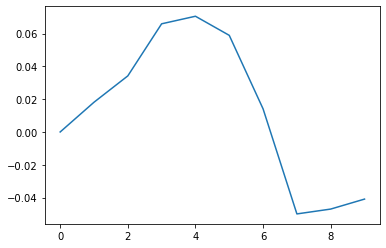

In [18]:
plt.plot(ar_means)

### Plotting Area Change of 500 Random Cells

* Looks like noise
* Shows the need for regional specificity

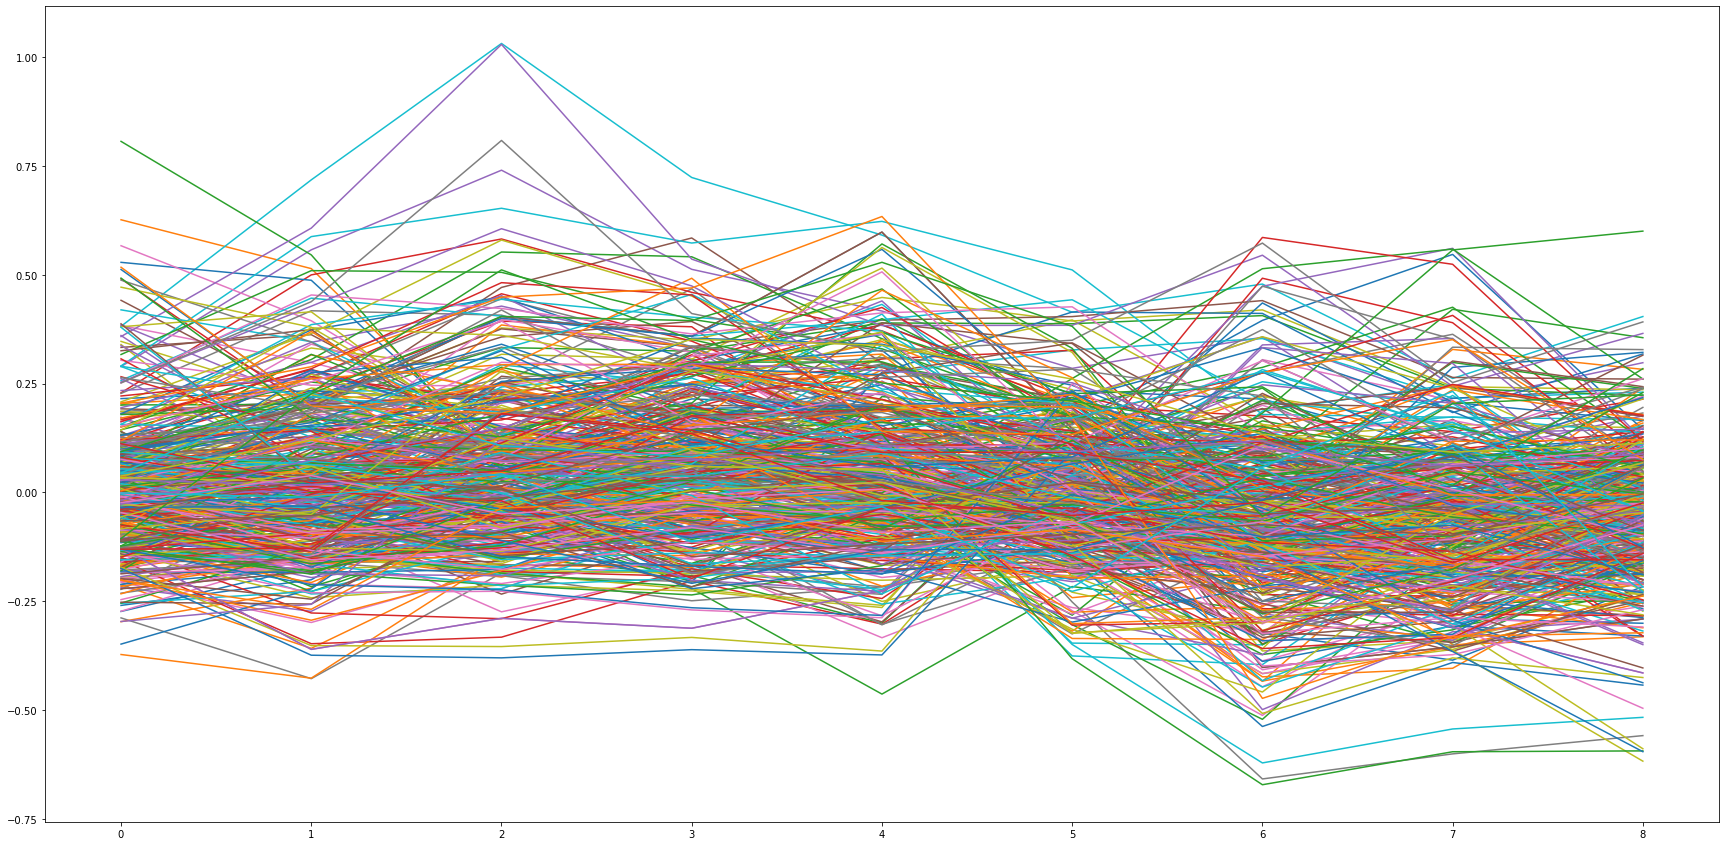

In [19]:
plt.figure(figsize=(30,15))

cells = []

# choose a random element from a list
from random import seed
from random import choice
# seed random number generator
seed(1)
# prepare a sequence
sequence = [i for i in range(149195)]
# print(sequence)
# make choices from the sequence
for _ in range(500):
    selection = choice(sequence)
#     print(selection)
    cells.append(selection)

for i in cells:
    plt.plot(ar_df[:,i])

### Using Regional Segments from Manual Paraview Labelling

In [20]:
roof_df = pd.read_csv('/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/strain_segments/roof.csv')
roof_df['vtkOriginalCellIds'].values

array([ 14975,  14977,  14978, ..., 149188, 149189, 149190])

In [21]:
df

,Area
0,-0.111331
1,-0.113829
2,-0.116229
3,-0.115951
4,-0.112530
...,...
149190,0.009099
149191,-0.185872
149192,-0.177086
149193,-0.175245


In [22]:
# Test re-creating Dataframe of Area Change for ALL cells from ar_df at dcm9
df_test = pd.DataFrame(ar_df[-1,:])
df_test

,0
0,-0.111331
1,-0.113829
2,-0.116229
3,-0.115951
4,-0.112530
...,...
149190,0.009099
149191,-0.185872
149192,-0.177086
149193,-0.175245


In [23]:
# Test filtering DataFrame based on regional Cell IDs for roof
df_test.filter(items=roof_df['vtkOriginalCellIds'].values, axis=0)

,0
14975,-0.028203
14977,-0.026348
14978,-0.026461
16064,-0.029580
16070,-0.038491
...,...
149178,-0.020157
149187,0.006412
149188,-0.000208
149189,0.019803


In [24]:
roof_df

,Cell ID,vtkOriginalCellIds,Cell Type,elemTag,fiber_0,fiber_1,fiber_2,fiber_Magnitude
0,0,14975,5,0,1.0,0.0,0.0,1.0
1,1,14977,5,0,1.0,0.0,0.0,1.0
2,2,14978,5,0,1.0,0.0,0.0,1.0
3,3,16064,5,0,1.0,0.0,0.0,1.0
4,4,16070,5,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
27532,27532,149178,5,0,1.0,0.0,0.0,1.0
27533,27533,149187,5,0,1.0,0.0,0.0,1.0
27534,27534,149188,5,0,1.0,0.0,0.0,1.0
27535,27535,149189,5,0,1.0,0.0,0.0,1.0


In [25]:
# Read all cell IDs from regions
postwall_df = pd.read_csv('/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/strain_segments/post_wall.csv')
antwall_df = pd.read_csv('/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/strain_segments/ant_wall.csv')
latwall_df = pd.read_csv('/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/strain_segments/lat_wall.csv')
sept_df = pd.read_csv('/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/strain_segments/sept.csv')

In [26]:
sept_df.shape

(14739, 8)

In [27]:
# Initialise empty arrays for area change for cells in respective regions for all 9 time phases
ar_roof = np.zeros((9, 27537))
ar_postwall = np.zeros((9, 29904))
ar_antwall = np.zeros((9, 33662))
ar_latwall = np.zeros((9, 19967))
ar_sept = np.zeros((9, 14739))

In [28]:
# Get regional OriginalCellIDs values
roof_IDs = roof_df['vtkOriginalCellIds'].values
postwall_IDs = postwall_df['vtkOriginalCellIds'].values
antwall_IDs = antwall_df['vtkOriginalCellIds'].values
latwall_IDs = latwall_df['vtkOriginalCellIds'].values
sept_IDs = sept_df['vtkOriginalCellIds'].values


# Loop over time frames
for i in range(1,10):
    
    # Retrieve Area Strain df of all cells at given time frame i
    j = i-1
    df_t = pd.DataFrame(ar_df[j, :])
    
    # Create dataframe of area changes for given region
    df_t_roof = df_t.filter(items=roof_IDs, axis=0)
    df_t_postwall = df_t.filter(items=postwall_IDs, axis=0)
    df_t_antwall = df_t.filter(items=antwall_IDs, axis=0)
    df_t_latwall = df_t.filter(items=latwall_IDs, axis=0)
    df_t_sept = df_t.filter(items=sept_IDs, axis=0)
    
    # Put each region's dataframe into region's array 
    ar_roof[j, :] = np.squeeze(df_t_roof.to_numpy())
    ar_postwall[j, :] = np.squeeze(df_t_postwall.to_numpy())
    ar_antwall[j, :] = np.squeeze(df_t_antwall.to_numpy())
    ar_latwall[j, :] = np.squeeze(df_t_latwall.to_numpy())
    ar_sept[j, :] = np.squeeze(df_t_sept.to_numpy())

In [29]:
# Take means in all regions for each time frame
ar_means_roof = ar_roof.mean(axis=1)
ar_means_postwall = ar_postwall.mean(axis=1)
ar_means_antwall = ar_antwall.mean(axis=1)
ar_means_latwall = ar_latwall.mean(axis=1)
ar_means_sept = ar_sept.mean(axis=1)

In [30]:
# Append area change = 0 at dcm0 for all regional strains
zero_start = [0]
zero_start.extend(ar_means_roof)
ar_means_roof = np.array(zero_start)

zero_start = [0]
zero_start.extend(ar_means_postwall)
ar_means_postwall = np.array(zero_start)

zero_start = [0]
zero_start.extend(ar_means_antwall)
ar_means_antwall = np.array(zero_start)

zero_start = [0]
zero_start.extend(ar_means_latwall)
ar_means_latwall = np.array(zero_start)

zero_start = [0]
zero_start.extend(ar_means_sept)
ar_means_sept = np.array(zero_start)


## Plotting Regional Average Area Change

### Preliminary Comments

* General: Since we are looking at area change, which we defined as:

$\epsilon_{Area} = \frac{A_{final} - A_{initial}}{A_{initial}}$

all below area changes show __percentage area change wrt initial size at ED__. Therefore we should expect positive Area change at ES (around dcm4) due to the __reservoir phase__. May not expect negative area change in __conduit phase__ since this is passive transfer of blood, and longitudinal strain (ECHO) usually shows positive strain here. __Contractile Phase__: expect negative area change here due to booster pump function. 

* Taking mean of all cells shows general pattern of increase in area 0 - 40 %; cells start to get smaller than their initial size around 60 %; cells start to get smaller than intial size from 60 - 90 %
* Roof does not replicate this pattern. Little growth in cell area, followed by decrease in cell area from 40 - 60 % and then area stays constant.
* Post Wall: Shows similar general pattern as ALL cells, but less smooth (this may be due to initial selection of Post Wall cells in Paraview). Post Wall has thick myocardial volume, so large motion may make sense.
    * __NB: really should classify cells from ED. Did at ES__
* Ant Wall: little signs of general pattern. Small increase at end of reservoir period.
* Lateral Wall: __largest area change magnitude__. High myocardial volume. Similar to general pattern.
* Septal Wall: Shows little expansion (as expected since attached to RA). However shows LARGE decrease in area during conduit and contractile phases. 

#### To do

* Do for more cases to see how these observations generalise
* Repeat region labelling at ED (dcm0 mesh)
* Have to account for variability in Manual regional labelling - need to standardise this
* Apply for different types of strains
* For further investigation: Produce colormaps at time points of interest & can qualitatively inspect regional area change

#### Notes on Manual Regional Labelling

* Post Wall too big: covers superior part of septal wall.
* Lat Wall too small: enlarge in posterior wall direction. (Make post wall smaller so it doesn't invade lat wall)
* Sept wall too small: need to enalrge towards post wall. Can even increase towards the ant wall at inferior.

Text(0.5, 1.0, 'Average of ALL cells')

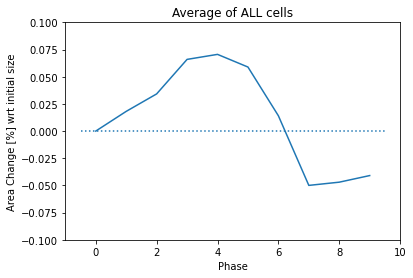

In [31]:
plt.plot(ar_means)

plt.ylim(-0.1, 0.1)
plt.hlines(0.0, -0.5, 9.5, linestyles='dotted')

plt.ylabel('Area Change [%] wrt initial size')
plt.xlabel('Phase')
plt.title('Average of ALL cells')

Text(0.5, 1.0, 'Average of Roof cells')

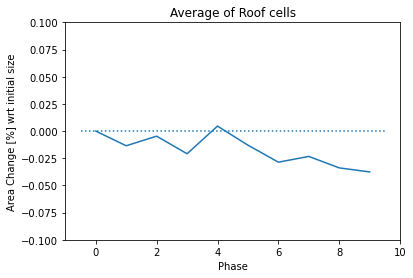

In [32]:
plt.plot(ar_means_roof)
plt.ylim(-0.1, 0.1)
plt.hlines(0.0, -0.5, 9.5, linestyles='dotted')

plt.ylabel('Area Change [%] wrt initial size')
plt.xlabel('Phase')
plt.title('Average of Roof cells')

Text(0.5, 1.0, 'Average of Posterior Wall cells')

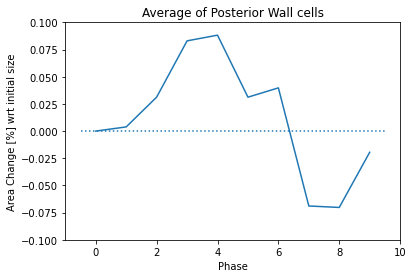

In [33]:
plt.plot(ar_means_postwall)
plt.ylim(-0.1, 0.1)
plt.hlines(0.0, -0.5, 9.5, linestyles='dotted')

plt.ylabel('Area Change [%] wrt initial size')
plt.xlabel('Phase')
plt.title('Average of Posterior Wall cells')

Text(0.5, 1.0, 'Average of Anterior Wall cells')

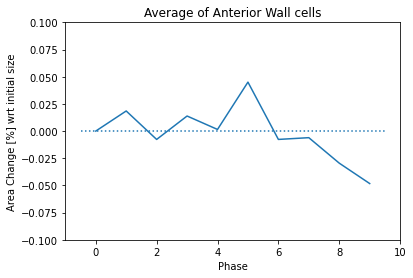

In [34]:
plt.plot(ar_means_antwall)
plt.ylim(-0.1, 0.1)
plt.hlines(0.0, -0.5, 9.5, linestyles='dotted')

plt.ylabel('Area Change [%] wrt initial size')
plt.xlabel('Phase')
plt.title('Average of Anterior Wall cells')

Text(0.5, 1.0, 'Average of Lateral Wall cells')

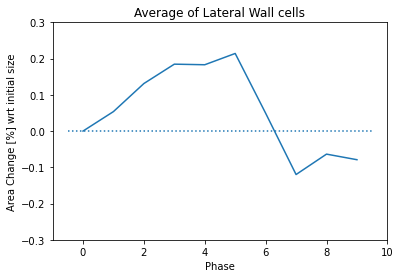

In [35]:
# NOTE DIFFERNET YLIMs

plt.plot(ar_means_latwall)
plt.ylim(-0.3, 0.3)
plt.hlines(0.0, -0.5, 9.5, linestyles='dotted')

plt.ylabel('Area Change [%] wrt initial size')
plt.xlabel('Phase')
plt.title('Average of Lateral Wall cells')

Text(0.5, 1.0, 'Average of Septal Wall cells')

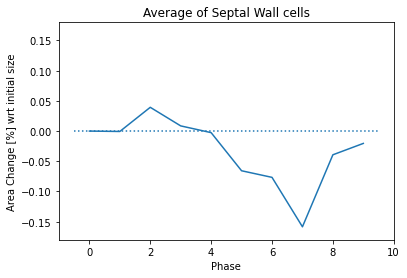

In [36]:
# NOTE DIFFERNET YLIMs

plt.plot(ar_means_sept)
plt.ylim(-0.18, 0.18)
plt.hlines(0.0, -0.5, 9.5, linestyles='dotted')

plt.ylabel('Area Change [%] wrt initial size')
plt.xlabel('Phase')
plt.title('Average of Septal Wall cells')

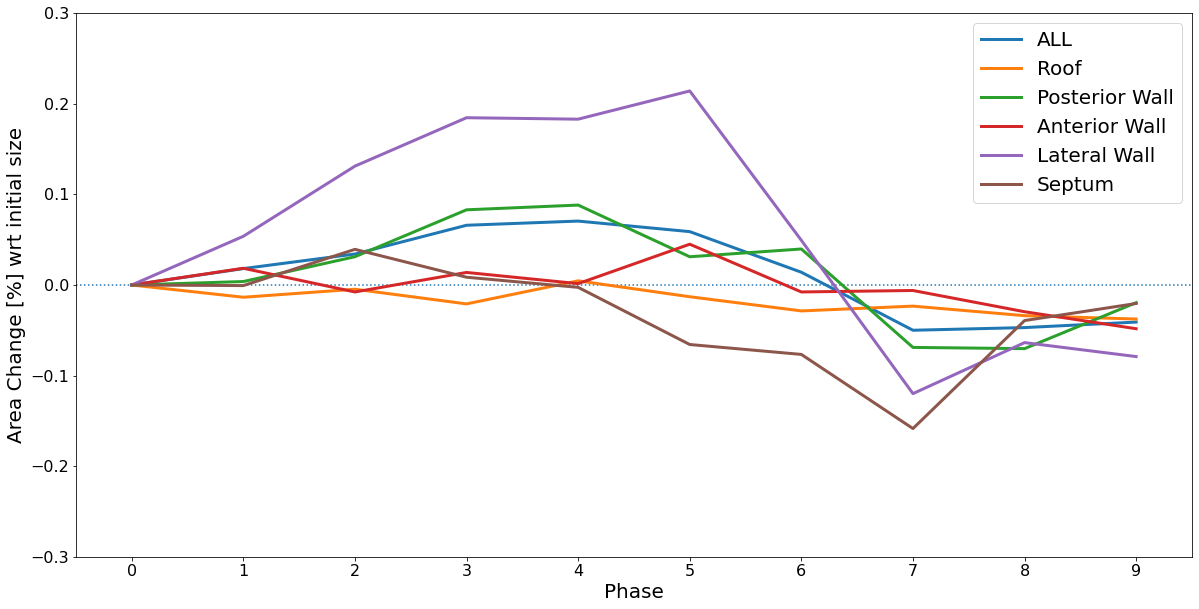

In [39]:
# Plotting all curves
plt.figure(figsize=(20,10))

plt.plot(ar_means, label='ALL', lw=3)
plt.plot(ar_means_roof, label='Roof', lw=3)
plt.plot(ar_means_postwall, label='Posterior Wall', lw=3)
plt.plot(ar_means_antwall, label='Anterior Wall', lw=3)
plt.plot(ar_means_latwall, label='Lateral Wall', lw=3)
plt.plot(ar_means_sept, label='Septum', lw=3)

plt.hlines(0.0, -0.5, 9.5, linestyles='dotted')
plt.ylabel('Area Change [%] wrt initial size', fontsize=20)
plt.xlabel('Phase', fontsize=20)
plt.ylim(-0.3, 0.3)
plt.xlim(-0.5, 9.5)

plt.xticks(np.arange(10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=20)

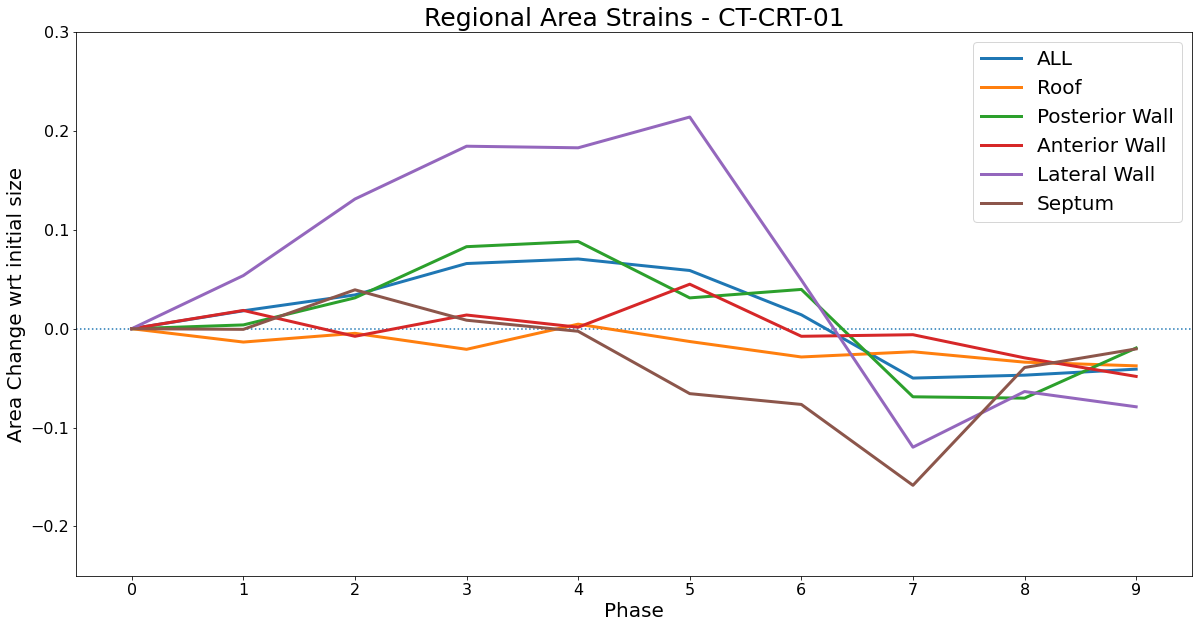

In [44]:
# Plotting all curves
plt.figure(figsize=(20,10))

plt.plot(ar_means, label='ALL', lw=3)
plt.plot(ar_means_roof, label='Roof', lw=3)
plt.plot(ar_means_postwall, label='Posterior Wall', lw=3)
plt.plot(ar_means_antwall, label='Anterior Wall', lw=3)
plt.plot(ar_means_latwall, label='Lateral Wall', lw=3)
plt.plot(ar_means_sept, label='Septum', lw=3)

plt.hlines(0.0, -0.5, 9.5, linestyles='dotted')
plt.ylabel('Area Change wrt initial size', fontsize=20)
plt.xlabel('Phase', fontsize=20)
plt.title("Regional Area Strains - CT-CRT-01", fontsize=25)
plt.ylim(-0.25, 0.3)
plt.xlim(-0.5, 9.5)

plt.xticks(np.arange(10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=20)
# plt.savefig('/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/MT-HiRes/SW-0.0-BE-4e-9/reg_area_strains.png', dpi=100, bbox_inches = 'tight')